In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

Load and combine data

In [66]:
# Load all PhysicalFlows csv files from PhysicalFlows_12.1.G using glob, then concatenate them into a single DataFrame.

physical_flows_df = pd.concat(
    (pd.read_csv(file, delimiter="\t", encoding='utf-8') for file in glob.glob("./data/PhysicalFlows_12.1.G/*.csv")),
    ignore_index=True
)

Convert DateTime column

In [67]:
# Convert the 'DateTime' column to datetime format for easier manipulation, enabling extraction of year.

physical_flows_df['DateTime'] = pd.to_datetime(physical_flows_df['DateTime'])

Filter the data to only include the rows with NO2 and Germany (DE_LU) together

In [68]:
# Apply a mask to select only the rows where the electricity flow is between NO2 and Germany (DE_LU).

mask = ((physical_flows_df['InMapCode'] == 'NO2') & (physical_flows_df['OutMapCode'] == 'DE_LU')) | \
       ((physical_flows_df['InMapCode'] == 'DE_LU') & (physical_flows_df['OutMapCode'] == 'NO2'))
filtered_flows_df = physical_flows_df[mask].copy()

Extract year from DateTime for grouping

In [69]:
# Add a 'Year' column to make it possible to group data by year.

filtered_flows_df['Year'] = filtered_flows_df['DateTime'].dt.year

Group and summarize data for exports and imports

In [70]:
# Group the filtered data by year and direction of flow, summarizing the total flow value.

summary = filtered_flows_df.groupby(['Year', 'OutMapCode', 'InMapCode'])['FlowValue'].sum().reset_index()

Separate exports and imports for plotting

In [71]:
# Create separate DataFrames for exports and imports.

exports_df = summary[(summary['OutMapCode'] == 'NO2') & (summary['InMapCode'] == 'DE_LU')]
imports_df = summary[(summary['OutMapCode'] == 'DE_LU') & (summary['InMapCode'] == 'NO2')]

Create and display the bar plot to visualize annual electricty imports and exports between NO2 and Germany from Nordlink

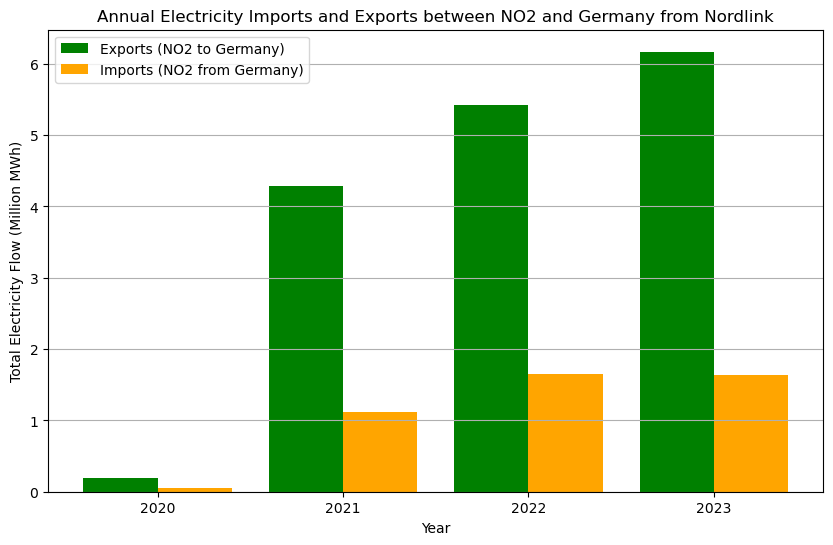

In [72]:
# Plotting the annual electricity exports and imports between NO2 and Germany.

# Adding necessary lables, titles, legend, graph size, and bar colors. 

fig = plt.figure(figsize=(10, 6))
plt.bar(exports_df['Year'] - 0.2, exports_df['FlowValue'] / 1e6, width=0.4, color='green', label='Exports (NO2 to Germany)')
plt.bar(imports_df['Year'] + 0.2, imports_df['FlowValue'] / 1e6, width=0.4, color='orange', label='Imports (NO2 from Germany)')
plt.xlabel('Year')
plt.ylabel('Total Electricity Flow (Million MWh)')
plt.title('Annual Electricity Imports and Exports between NO2 and Germany from Nordlink')
plt.legend()
plt.xticks(sorted(filtered_flows_df['Year'].unique()))
plt.grid(axis='y')

Save the bar plot as "figure_task3.png"

In [73]:
# Save the plot in the folder

fig.savefig("./figure_task3.png")

Conclusion:

Since the opening of Nordlink, NO2 has exported significantly more electricty to Germany than it has imported from Germany. We see from the chart that the annual sum of electricty exported from NO2 to Germany has increased by approximately 1 million MWh per year from 2021 to 2023. In the same time period, the annual sum of electricty imported to NO2 from Germnay, has been steady, with an annual sum between 1 and 2 million MWh.